1. Один конец пружины жесткостью k закреплен неподвижно, а к другому прикреплен груз массы m, к которому приложена внешняя сила f. При движении груза со скоростью v сила сопротивления равна hv. При t = 0 грузу, находившемуся в положении равновесия, сообщают начальную скорость v0. Исследовать движение груза в случаях $h^2 < 4mk$ и $h^2 > 4mk$ с помощью python (или MatLab). Рассмотреть следующие ситуации:    
1) $f = 0$  
2) $f = t - 1$
3) $f = e^{-t}$
4) $f = b\sin(\omega t)$
Представить графики закона движения груза для аналитического и численного решения задачи.  
  
---

Данная задача представляет собой решение дифференциального уравнения второго порядка с неоднородным членом.
Решается с помощью уравнения движения:
$$m\ddot{x} + h\dot{x} + kx = f(t)$$  
где x(t) — положение груза, m — масса, h — коэффициент сопротивления, k — жесткость пружины, а f(t) — внешняя сила.  
Аналитическое решение     
* Общее решение однородного уравнения (где f(t)=0):  
$m\frac{d^2x}{dt^2} + h\frac{dx}{dt} + kx = 0$  
$m\ddot{x} + h\dot{x} + kx = 0$  
Характеристическое уравнение:  
$m\lambda^2 + h\lambda + k = 0$  
$D = h^2 - 4mk$  
1) $D > 0: \lambda_1 = \frac{-h + \sqrt{h^2 - 4mk}}{2m}, \lambda_2 = \frac{-h - \sqrt{h^2 - 4mk}}{2m}$  
$ x(t) = c_1e^{\lambda_1t} + c_2e^{\lambda_2t}$  
2) $D = 0: \lambda = \frac{-h}{2m} \; \Rightarrow \; x(t) = (c_1 + c_2t)e^{\lambda t}$  
3) $D < 0: \lambda_1 = \frac{-h}{2m} + \frac{i\sqrt{4mk - h^2}}{2m}, \lambda_2 = \frac{-h}{2m} - \frac{i\sqrt{4mk - h^2}}{2m}$  
$ x(t) = e^{\frac{-h}{2m}t}(c_1\cos{\frac{\sqrt{4mk - h^2}}{2m}t} + c_2\sin{\frac{\sqrt{4mk - h^2}}{2m}t})$  
Частное решение неоднородного уравнения зависит от вида f(t).  

* Подстановка f(t):  
  $f = 0$: Решение будет зависеть только от затухания.  
  $f = t - 1$: Используется метод неопределённых коэффициентов.  
  $f = e^{-t}$: Используется метод вариации произвольных постоянных.  
  $f = b \cdot \sin(ωt)$: Используется метод вариации параметров.  

Численное решение  
Уравнение преобразуется в систему
$$\begin{cases}
v = \frac{dx}{dt} \\
m\frac{dv}{dt} = -hv + kx + f(t)
\end{cases}$$
В разностной форме методом Эйлера система выглядит так:
$$\begin{cases}
v_{n+1} = v_n + \frac{kx_n - hv_n + f(t_n)}{m}dt \\
x_{n+1} = x_n + v_{n+1}dt
\end{cases}$$



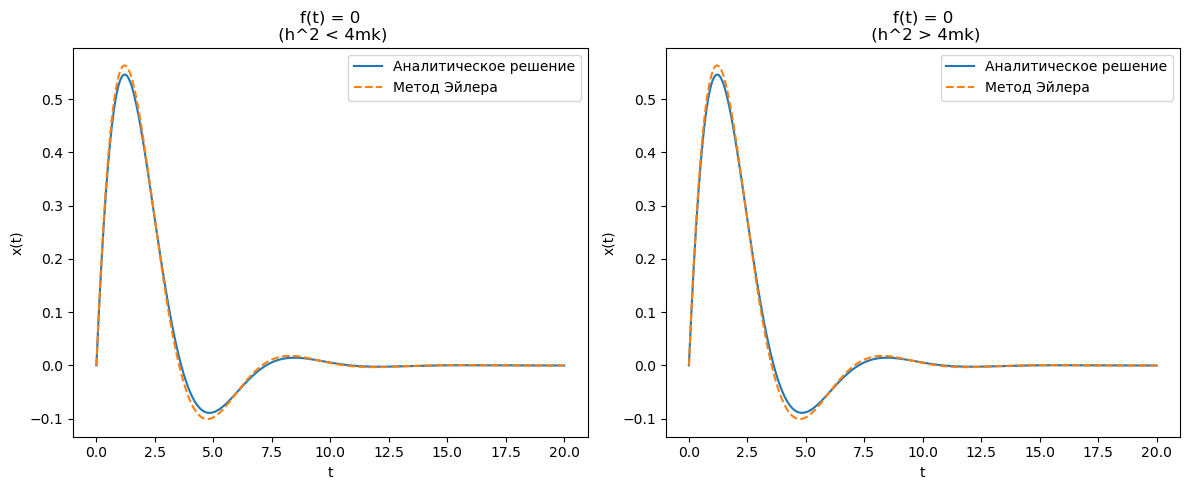

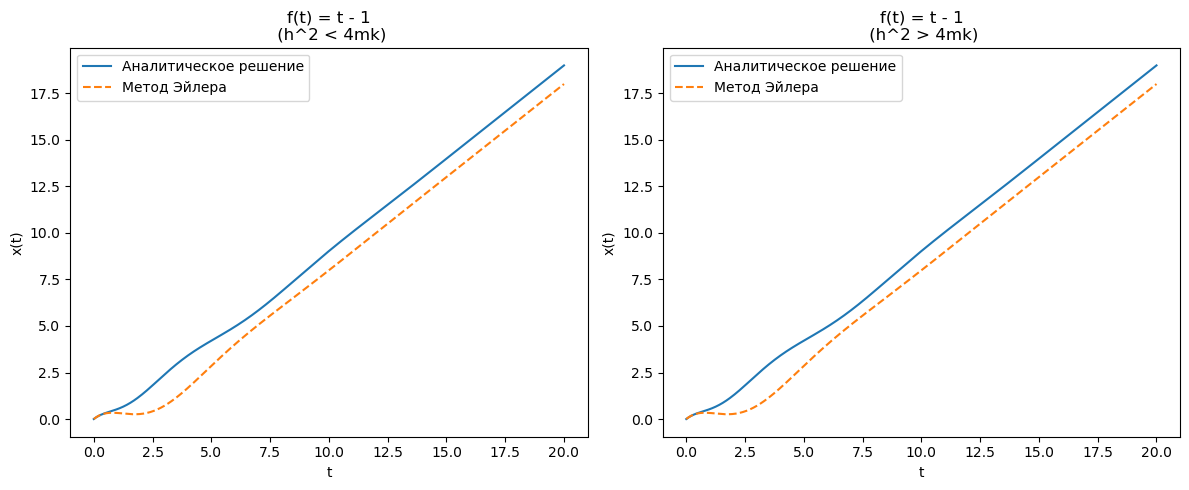

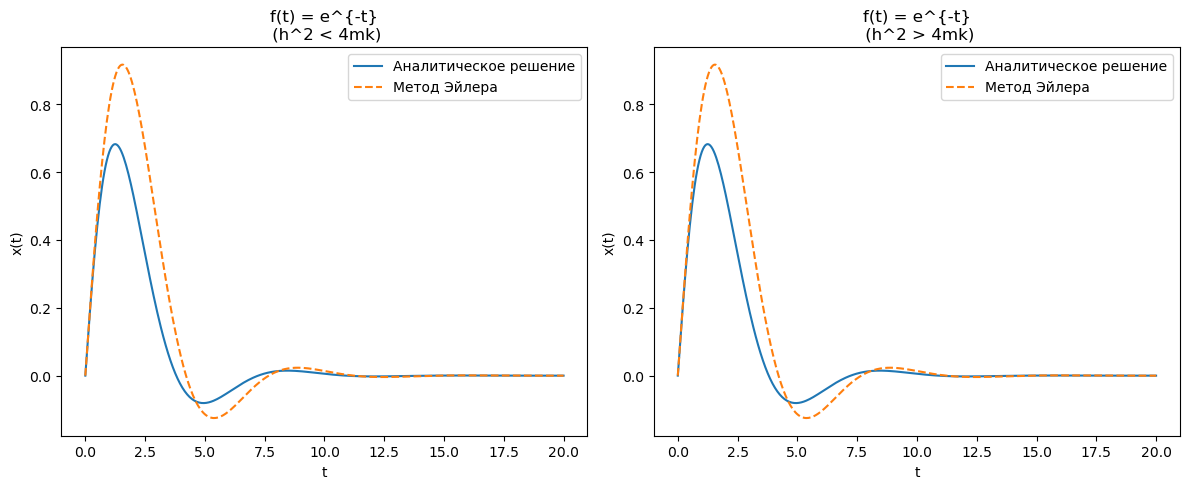

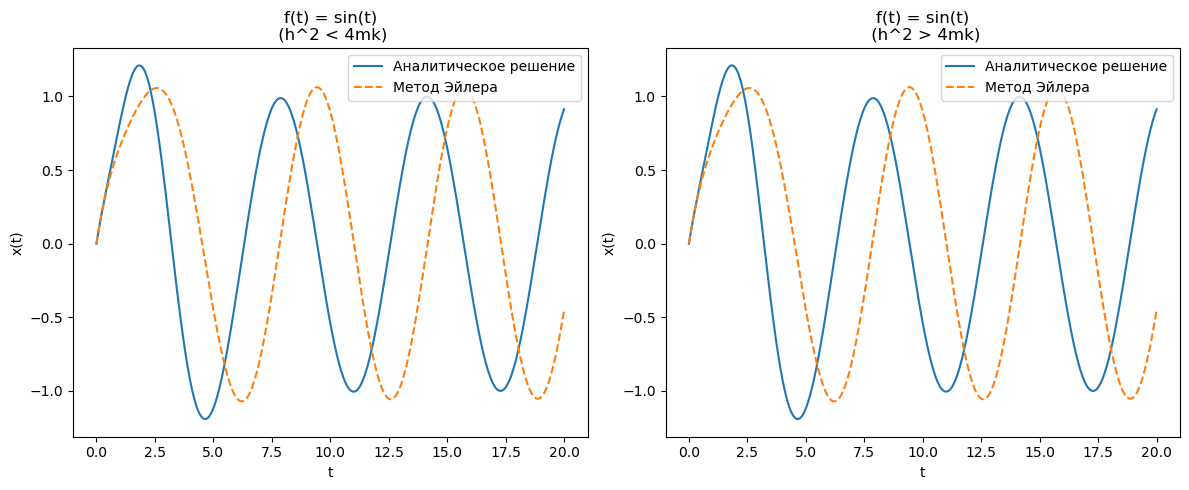

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, dsolve, Eq, exp, sin, lambdify, simplify

m = 1.0
k = 1.0
v0 = 1.0
x0 = 0.0
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 400)
dt = t_eval[1] - t_eval[0]

h_under = 1.0
h_over = 4.0

forces = [
    {'name': 'f(t) = 0', 'f_expr': 0, 'f_func': lambda t: 0},
    {'name': 'f(t) = t - 1', 'f_expr': symbols('t') - 1, 'f_func': lambda t: t - 1},
    {'name': 'f(t) = e^{-t}', 'f_expr': exp(-symbols('t')), 'f_func': lambda t: np.exp(-t)},
    {'name': 'f(t) = sin(t)', 'f_expr': sin(symbols('t')), 'f_func': lambda t: np.sin(t)}
]

def analytical_solution(h, f_expr):
    t = symbols('t', real=True)
    x = Function('x')(t)
    f = f_expr
    eq = Eq(m * x.diff(t, t) + h * x.diff(t) + k * x, f)
    ics = {x.subs(t, 0): x0, x.diff(t).subs(t, 0): v0}
    sol = dsolve(eq, x, ics=ics)
    x_t = simplify(sol.rhs)
    x_func = lambdify(t, x_t, modules=['numpy'])
    return x_func

def euler_method(h, f_func):
    t = t_eval
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0

    for i in range(1, len(t)):
        x[i] = x[i-1] + dt * v[i-1]
        v[i] = v[i-1] + dt * (f_func(t[i-1]) - h * v[i-1] - k * x[i-1]) / m

    return t, x

def plot_results(t_eval, x_analytical_under, x_num_under, x_analytical_over, x_num_over, force_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(t_eval, x_analytical_under(t_eval), label='Аналитическое решение')
    plt.plot(t_eval, x_num_under, '--', label='Метод Эйлера')
    plt.title(f'{force_name}\n (h^2 < 4mk)')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(t_eval, x_analytical_under(t_eval), label='Аналитическое решение')
    plt.plot(t_eval, x_num_under, '--', label='Метод Эйлера')
    plt.title(f'{force_name}\n (h^2 > 4mk)')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()

    plt.tight_layout()
    plt.show()

for force in forces:
    force_name = force['name']
    f_expr = force['f_expr']
    f_func = force['f_func']

    x_analytical_under = analytical_solution(h_under, f_expr)
    _, x_num_under = euler_method(h_under, f_func)

    x_analytical_over = analytical_solution(h_over, f_expr)
    _, x_num_over = euler_method(h_over, f_func)

    plot_results(t_eval, x_analytical_under, x_num_under, x_analytical_over, x_num_over, force_name)

2. Найти решение следующей краевой задачи:  
$y'' - x^2y' - \frac{2}{x^2}y=1 + \frac{4}{x^2}$  
$2y(\frac{1}{2}) - y'(\frac{1}{2}) = 6$  
$y(1) + 3y'(1) = -1$  
Построить графики решения и вывести значения табличной функции
---
Будем решать с помощью метода прогонки:  
1. Дискретизация уравения. Заменим производные y' и y'' в уравнении на конечные разности:
   $$ y'' \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} $$
   $$ y' \approx \frac{y_{i+1} - y_{i-1}}{2h} $$
   Подставим в уравнение:  
   $$ \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} - x_i^2 \frac{y_{i+1} - y_{i-1}}{2h} - \frac{2}{x_i^2}y_i = 1 + \frac{4}{x_i^2} $$
   Перенесем все слагаемые с y в левую часть, а свободный член в правую:
   $$ y_{i+1}\cdot (\frac{1}{h^2} - \frac{x_i}{2h}) + y_i\cdot (-\frac{2}{h^2} - \frac{2}{x_i^2}) + y_{i-1}\cdot (\frac{1}{h^2} + \frac{x_i}{2h}) = 1 + \frac{4}{x_i^2} $$
   Получаем линейное разностное уравнение:
   $$ a_i y_{i+1} + b_i y_i + c_i y_{i-1} = f_i $$
   Где:
   $$ a_i = \frac{1}{h^2} - \frac{x_i}{2h} $$
   $$ b_i = -\frac{2}{h^2} - \frac{2}{x_i^2} $$
   $$ c_i = \frac{1}{h^2} + \frac{x_i}{2h} $$
   $$ f_i = 1 + \frac{4}{x_i^2} $$  
2. Учет краевых условий:
   * При $x = \frac{1}{2}: \; 2y(0.5) - y'(0.5) = 6$. Разностное уравнение будет иметь вид:
   $$2y_0 - \frac{y_1 - y_{0}}{h} = 6$$
   Исключаем $y_{-1}: \; y_{-1} = y_1 - 2hy'(0.5)$
   * При $x = 1: \; y(1) + 3y' = 2$. Разностное уравнение будет иметь вид:
   * $$y_N + 3\frac{y_{N + 1} - y_{N-1}}{2h} = -1$$
   Исключаем $y_{N + 1}: \; y_{N + 1} = y_{N - 1} - 2hy'(1)$
3. Решение методом прогонки.  
   * Прямой ход:
   $$\alpha_i = - \frac{c_{i-1}}{b_{i-1} + a_{i-1}\alpha_{i-1}}, \; \beta_i = \frac{f_i - a_{i-1}\beta_{i-1}}{b_{i-1} + a_{i-1}\alpha_{i-1}}$$
   * Обратный ход:
   $$y_i = \alpha_i y_{i + 1} + \beta_i$$

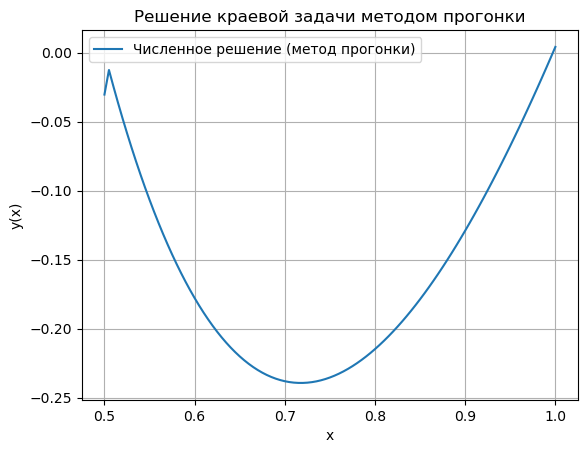

Табличные значения функции y(x):
x = 0.500, y = -0.030303
x = 0.505, y = -0.012480
x = 0.510, y = -0.024529
x = 0.515, y = -0.036158
x = 0.520, y = -0.047377
x = 0.525, y = -0.058195
x = 0.530, y = -0.068621
x = 0.535, y = -0.078664
x = 0.540, y = -0.088332
x = 0.545, y = -0.097633
x = 0.550, y = -0.106576
x = 0.555, y = -0.115167
x = 0.560, y = -0.123415
x = 0.565, y = -0.131325
x = 0.570, y = -0.138906
x = 0.575, y = -0.146163
x = 0.580, y = -0.153103
x = 0.585, y = -0.159732
x = 0.590, y = -0.166057
x = 0.595, y = -0.172082
x = 0.600, y = -0.177813
x = 0.605, y = -0.183256
x = 0.610, y = -0.188417
x = 0.615, y = -0.193299
x = 0.620, y = -0.197909
x = 0.625, y = -0.202251
x = 0.630, y = -0.206330
x = 0.635, y = -0.210149
x = 0.640, y = -0.213715
x = 0.645, y = -0.217030
x = 0.650, y = -0.220099
x = 0.655, y = -0.222927
x = 0.660, y = -0.225516
x = 0.665, y = -0.227871
x = 0.670, y = -0.229997
x = 0.675, y = -0.231895
x = 0.680, y = -0.233570
x = 0.685, y = -0.235026
x = 0.690, y = -0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x0, xN = 0.5, 1  
N = 100 
h = (xN - x0) / N
x = np.linspace(x0, xN, N + 1)

a = lambda i: 1 / h**2 - x[i]**2 / (2 * h)
b = lambda i: -2 / h**2 - 2 / x[i]**2
c = lambda i: 1 / h**2 + x[i]**2 / (2 * h)
f = lambda i: 1 + 4 / x[i]**2

alpha = np.zeros(N + 1)
beta = np.zeros(N + 1)

for i in range(1, N):
    denom = b(i) + a(i) * alpha[i - 1]
    alpha[i] = -c(i) / denom
    beta[i] = (f(i) - a(i) * beta[i - 1]) / denom

alpha[0] = 0
beta[0] = 6 / (2 - 1 / h)
alpha[N] = 0
beta[N] = (-1 - 3 * beta[N - 1] / (2 * h)) / (1 + 3 * alpha[N - 1] / (2 * h))

y = np.zeros(N + 1)
y[N] = beta[N]
for i in range(N - 1, -1, -1):
    y[i] = alpha[i] * y[i + 1] + beta[i]

plt.plot(x, y, label="Численное решение (метод прогонки)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Решение краевой задачи методом прогонки")
plt.grid()
plt.legend()
plt.show()

print("Табличные значения функции y(x):")
for xi, yi in zip(x, y):
    print(f"x = {xi:.3f}, y = {yi:.6f}")
